 **Prepare all required libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Import Dataset**

In [2]:
#import dataset
df_load = pd.read_csv('https://raw.githubusercontent.com/dimsdika12/data-analytics-projects/main/Telco_Data%20Preprocessing/dataset/telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Jumlah ID yang unik
print(df_load["customerID"].nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBi

# **Look for a valid customer ID (Phone number)**

**Filtering Customer ID Numbers in Certain Formats**
- Character length is 11-12.
- Consists of numbers only, no characters other than numbers are allowed
- Starting with the number 45, the first 2 digits.

In [3]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


**Filtering Duplicate Customer ID Numbers**

Make sure there are no duplicate customer IDs. ID duplication often occurs for two main reasons:

- Duplication is caused by filling in data more than once with the same values for each column.
- Duplication is caused by data filling in at different data collection periods.

In [4]:
df_load.duplicated('customerID').sum()

13

In [5]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


In [6]:
df_load.duplicated().sum()

0

# **Handling Missing Values**

In [7]:
df_load.isnull().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

Missing values are found in the column `Churn`, `tenure`, `MonthlyCharges` & `TotalCharges`.

Handling Missing Values by Removing Rows
- remove missing value rows in column `churn`

In [8]:
print("Total missing values data dari kolom Churn",df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print("Total Rows dan kolom Data setelah dihapus data Missing Values adalah",df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


Handling Missing Values by Filling in Certain Values
- fill missing value column `tenure` with 11
- fill others column missing `value `with median

In [9]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


In [10]:
#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11,inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in  list(['MonthlyCharges','TotalCharges']):
    #write your command here
	median = df_load[col_name].median()
	df_load[col_name].fillna(median, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


# **Detecting outliers**

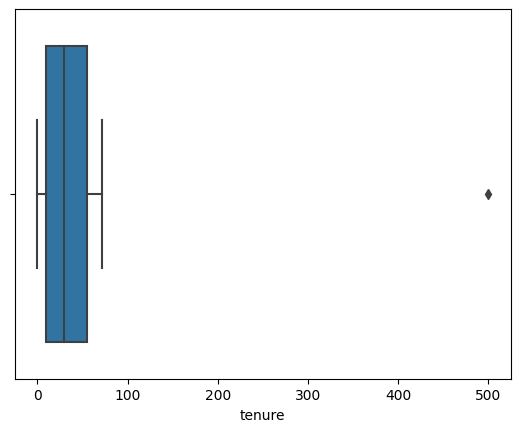

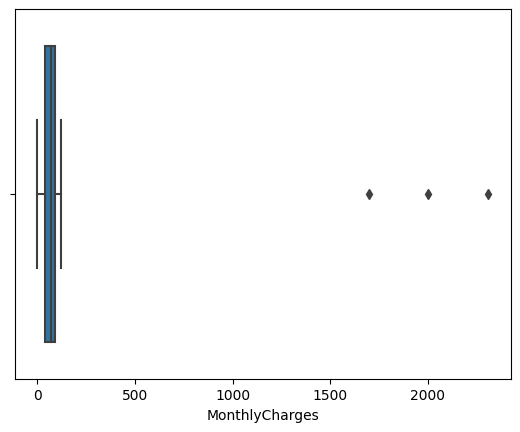

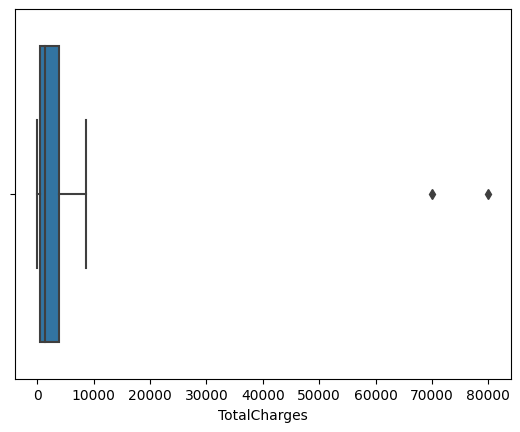

In [11]:
# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

In [12]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum  = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)

more_than     = (df_load > maximum)
lower_than    = (df_load < minimum)
df_load       = df_load.mask(more_than, maximum, axis=1)
df_load       = df_load.mask(lower_than, minimum, axis=1)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-12-1fac22a4fc00>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than     = (df_load > maximum)
<ipython-input-12-1fac22a4fc00>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than    = (df_load < minimum)


plot boxplot to cek again outlier

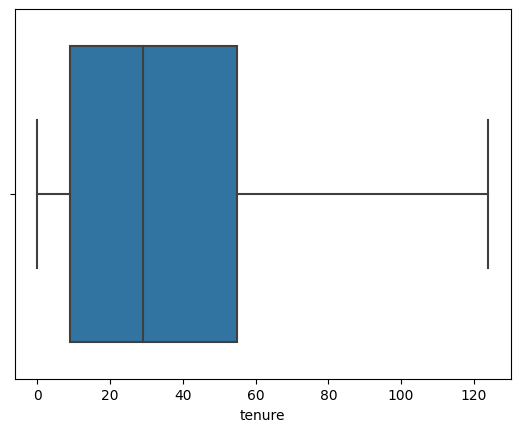

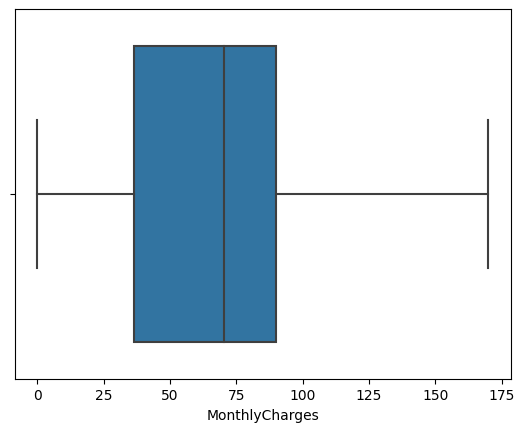

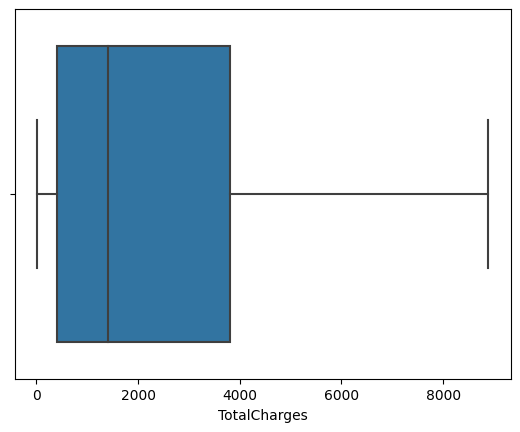

In [14]:
# Misal untuk kolom tenure
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()
# dan seterusnya untuk kedua kolom yang tersisa secara berurut
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# **Standardizing the Values of Variables**

cek value_counts each columns to counts the number of occurrences of each unique value in a column

In [17]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                      'Contract','PaperlessBilling','PaymentMethod','Churn']):
	#write your command here
	print('\nUnique Values Count Before Standardized Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Stand

After inspection, it was determined that three columns (gender, Dependents, Churn) contain several non-standard variables. Those variables are:

- `Gender` (Female, Male, Woman, Man), which can be unified to (Female, Male) as they carry identical meanings.
- `Dependents` (Yes, No, Yes), which can be standardized to (Yes, No) since they convey the same intent.
- `Churn` (Yes, No, Churn), which can be standardized to (Yes, No) as it signifies the same concept.

In [18]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

#Loop
for col_name in (['gender','Dependents','Churn']):
	#write your command here
	print('\nUnique Values Count After Standardized Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
